# Algotytm przecinania się odcinków na płaszczyźnie

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [2]:
def draw_example_1():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))

    vis.add_line_segment(line_segments)
    vis.show()
    
def draw_example_2():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()


### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

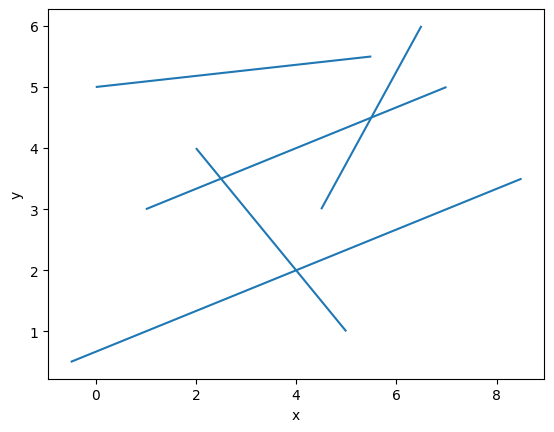

In [3]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

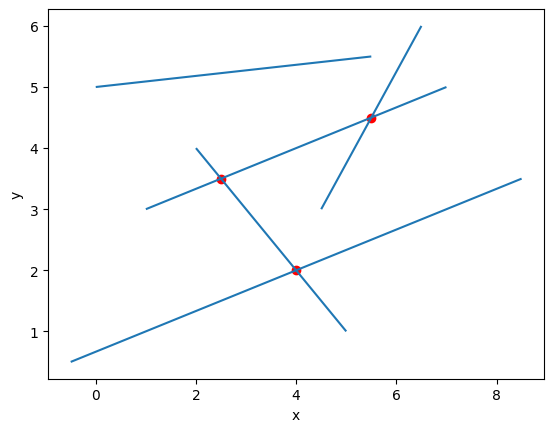

In [4]:
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [5]:
def generate_uniform_sections(max_x,max_y,n):
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów. 
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: dla x - (0, max_x), dla y - (0, max_y).
    Pierwszy punkt reprezentujący odcinek to punkt "lewy" - o mniejszej współrzędnej x, drugi punkt to "prawy"
    :param max_x: określa maksymalną wartość współrzędnej x, jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzędnej y, jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica długości n odcinków w postaci krotek zawierających parę krotek 
    współrzędnych końców odcinków np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """
    used_x=set()
    sections=[]
    
    while len(sections)<n:
        x1=np.random.uniform(0,max_x)
        if x1 in used_x: 
            continue
        used_x.add(x1)
        y1=np.random.uniform(0,max_y)
        point1=(x1,y1)
        x2=np.random.uniform(0,max_x)
        if x2 in used_x: 
            continue
        used_x.add(x2)
        y2=np.random.uniform(0,max_y)
        point2=(x2,y2)
        if x1<x2:
            left,right=point1,point2
        else:
            left,right=point2,point1
        sections.append((left,right))
    return sections

In [6]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.069s


<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [7]:
# section = ...

Zwizualizuj otrzymane odcinki

In [8]:
# visualize = ...

Uzupełnij funkcję ```add_sections``` #interaktywne dodawanie odcinków przez rysowanie myszką

In [9]:
%matplotlib tk

interactive_sections=[]
used_x=set()
active=True
current_points=[]

def draw_point(point):
    """
    Funkcja rysuje punkt o współrzędnych przekazanych w argumencie.
    :param point: punkt reprezentowany przez krotkę współrzędnych x, y odczytanych z kliknięcia myszki
    """
    plt.scatter(point[0],point[1],color="red")
    plt.show()

def draw_line(points):
    """
    Funkcja rysuje odcinek między dwoma wskazanymi punktami.
    :param points: tablica punktów (krotek współrzędnych), które są końcami odcinka
    """
    ax=plt.gca()
    x=[points[0][0],points[1][0]]
    y=[points[0][1],points[1][1]]
    line=ax.plot(x,y,color="red") 
    ax.figure.canvas.draw()        

def onclick(event):
    """
    Funkcja obsługuje zdarzenie kliknięcia myszką, dodając końce odcinka
    w kliknięte miejsca lub kończąc wprowadzanie odcinków
    :param event: zdarzenie kliknięcia myszką, które przechowuje m. in. informacje 
    o klikniętym punkcie oraz to, który przycisk myszy został kliknięty
    """
    global active
    global current_points

    if event.dblclick and active:
        if event.button==1:
            x=event.xdata
            y=event.ydata
            if x in used_x:
                ax.set_title("Współrzędne x-owe punktów nie mogą się powtarzać!")
                plt.pause(1.5)
                ax.set_title("Kliknij dwukrotnie, aby dodać punkt.\nKażda kolejna para punktów stworzy odcinek")
            else:
                used_x.add(x)
                current_points.append((x,y))
                draw_point((x,y))
                if len(current_points)==2:
                    draw_line(current_points)
                    interactive_sections.append((current_points[0],current_points[1]))
                    current_points=[]
        elif event.button==3:
            if len(interactive_sections)<2:
                ax.set_title("Dodaj co najmniej dwa odcinki!")
                plt.pause(1.5)
                ax.set_title("Kliknij dwukrotnie, aby dodać punkt.\nKażda kolejna para punktów stworzy odcinek")
            else:
                active=False
                plt.pause(0.5)
                ax.set_title("Dziękuję! Zamykam w ciągu 2 sekund")
                plt.pause(2)
                plt.close()

fig,ax=plt.subplots()
plt.get_current_fig_manager().set_window_title("Wygeneruj własny zbiór odcinków!")
ax.set_title("Kliknij dwukrotnie, aby dodać punkt.\nKażda kolejna para punktów stworzy odcinek")
connection_id=fig.canvas.mpl_connect("button_press_event",onclick)
ax.set_xlim([0,2])
ax.set_ylim([0,2])
ax.aspect=1
plt.tight_layout()
plt.ion()
plt.show()

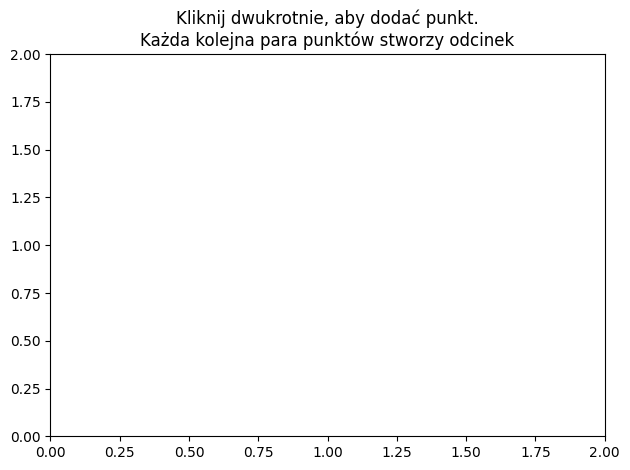

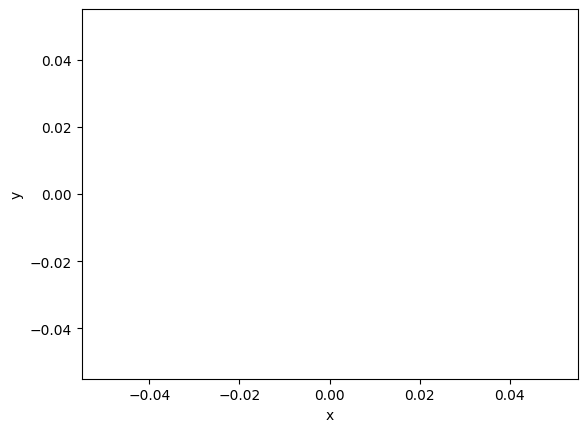

In [10]:
%matplotlib inline
vis=Visualizer()
vis.add_line_segment(interactive_sections)
vis.add_point([interactive_sections[i//2][i%2] for i in range(2*len(interactive_sections))])
vis.show()

In [11]:
sections_one=[((0.11160925733331661,0.29566077245230327),(1.7254225819790243,1.790774778966961)),
              ((0.11449622213590283,1.6818869241507675),(1.7600661596100593,0.1993369008841321)),
              ((0.489801646472114,1.7782107957189388),(0.5966193441678048,0.09463704048394597)),
              ((0.12893104614883405,0.5008724988366682),(1.6041700602704023,0.6265123313168915)),
              ((0.35700126555314693,0.21190088413215444),(0.8968636836367738,1.6651349464867378)),
              ((0.21842695502900744,1.4180432759422985),(1.5464307642186776,1.4180432759422985)),
              ((0.7496284787048755,1.6609469520707303),(1.396308594484193,0.9615518845974872))]

sections_two=[((0.4551580688410791,0.1909609120521172),(1.6070570250729885,1.8703466728711027)),
              ((0.23574874384452493,1.7363308515588642),(1.7023268635583344,1.4557352256863656)),
              ((0.8622201060057388,1.949918566775244),(1.2577342839600536,1.7698348068869239)),
              ((0.29926196950142214,1.2965914378780825),(1.731196511584197,0.660016286644951)),
              ((0.06541782049193678,0.8777919962773383),(0.5042364704850452,0.9866798510935318)),
              ((0.18667034220055884,0.6474523033969287),(1.1740123046850528,0.26634481154025125)),
              ((1.0556467477790168,0.6432643089809212),(1.503126292179884,0.5218124709167054))]

sections_three=[((0.25884446226521485,0.18677291763610973),(1.719648652373852,0.22027687296416928)),
                ((0.32235768792211206,1.4054792926942763),(0.5821845201548737,0.4296765937645416)),
                ((0.755402408310048,0.358480688692415),(1.7889358076359216,1.0620637505816657)),
                ((0.12893104614883405,0.7437761749651),(0.3483403711453883,0.7395881805490925)),
                ((0.20110516621349006,1.6525709632387156),(0.9084115428471187,1.928978594695207)),
                ((0.6428107810091847,1.459923220102373),(1.84378813888506,1.2212075383899486)),
                ((1.1826731990928114,1.4515472312703581),(1.5550916586264363,1.8368427175430428)), 
                ((0.5157843296953901,1.6441949744067006),(0.9141854724522911,1.6400069799906931)),
                ((1.3905346648790207,0.5678804094927873),(1.8206924204643704,0.37104467194043733))]

sections_four=[((0.07985264450486795,1.1667636109818518),(0.7958199155462553,0.6223243369008841)),
               ((0.1664615885824552,0.48830851558864585),(0.7525154435074617,0.8359120521172637)),
               ((0.19533123660831753,0.8065960912052116),(0.21842695502900744,0.8526640297812936)), 
               ((0.3079228639091809,0.7898441135411819),(0.40319270239452676,0.7647161470451372)),
               ((0.18378337739797257,1.3594113541181942),(1.6157179194807474,0.3626686831084225)),
               ((0.8824288596238425,0.32078873894834803),(1.8322402796747153,0.7479641693811074)),
               ((0.9488290500833261,0.517624476500698),(1.0354379941609133,0.4841205211726384)),
               ((1.127820867843673,0.5427524429967426),(1.1826731990928114,0.5720684039087948)), 
               ((0.5359930833134938,1.422231270358306),(1.6186048842833336,1.0201838064215913)),
               ((0.6745673938376333,1.0871917170777103),(1.7398574059919556,1.3971033038622613)),
               ((0.7294197250867718,1.1625756165658443),(0.7813850915333241,1.196079571893904)),
               ((0.8622201060057388,1.2128315495579338),(0.9517160148859123,1.2212075383899486))]
sections_five = [
    [(1.068548387096774, 8.879870129870131), (9.556451612903226, 8.717532467532468)],
    [(0.6048387096774195, 8.095238095238097), (9.233870967741934, 7.716450216450218)],
    [(0.8266129032258065, 6.49891774891775), (8.870967741935484, 6.066017316017317)],
    [(0.282258064516129, 5.0649350649350655), (8.528225806451612, 4.821428571428572)],
    [(1.693548387096774, 4.577922077922079), (7.762096774193548, 4.172077922077922)],
    [(1.0483870967741935, 2.4404761904761907), (5.625, 2.2240259740259742)],
    [(2.4395161290322585, 3.5768398268398274), (8.891129032258064, 2.9816017316017316)],
    [(2.0766129032258065, 0.7359307359307361), (8.427419354838708, 9.691558441558442)]
]

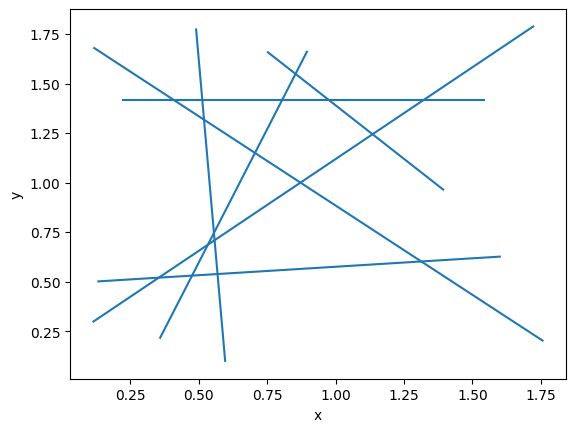

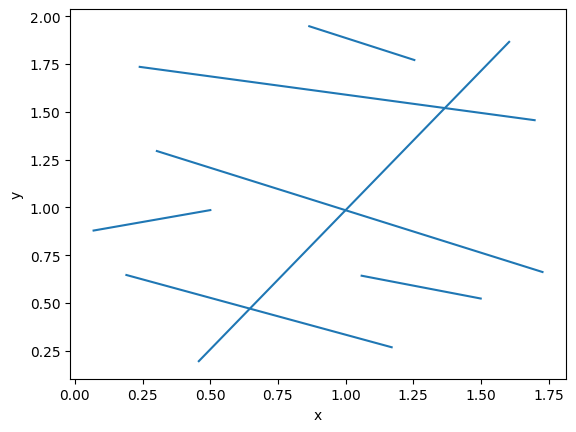

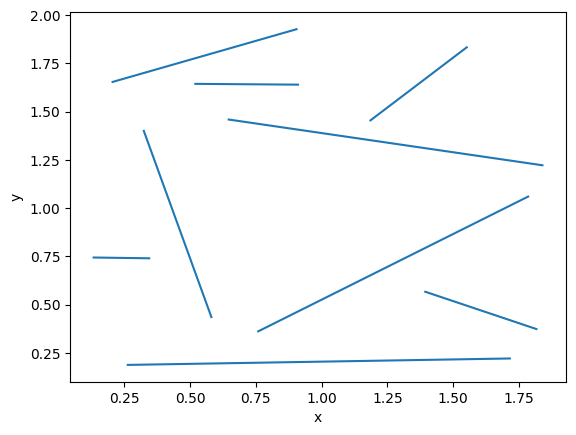

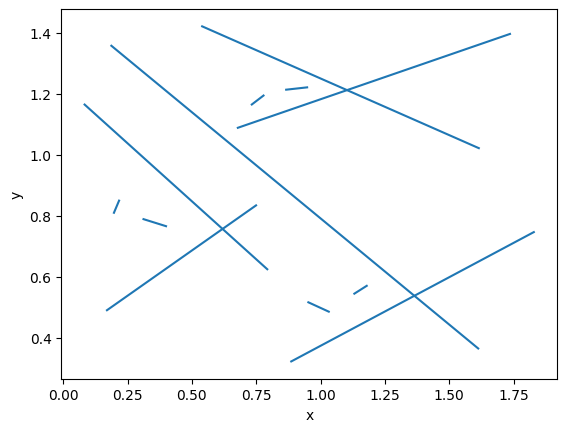

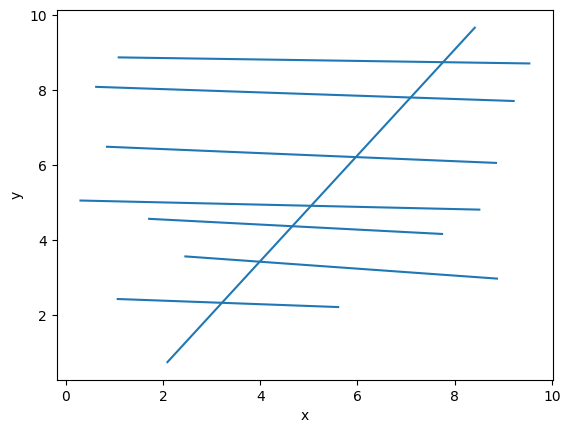

In [12]:
vis=Visualizer()
vis.add_line_segment(sections_one)
vis.show()
vis.clear()

vis.add_line_segment(sections_two)
vis.show()
vis.clear()

vis.add_line_segment(sections_three)
vis.show()
vis.clear()

vis.add_line_segment(sections_four)
vis.show()
vis.clear()

vis.add_line_segment(sections_five)
vis.show()
vis.clear()

Uzupełnij funkcję ```is_intersection```

In [13]:
from sortedcontainers import SortedSet

class Section:
    def __init__(self, L, R):
        self.L = L  
        self.R = R  
        self.a = (self.L[1] - self.R[1]) / (self.L[0] - self.R[0]) 
        self.b = self.L[1] - self.a * self.L[0] 
        self.x = L[0]

    @staticmethod
    def update_x(x):  
        Section.x = x

    def __eq__(self, other):
        return (self.L == other.L and self.R == other.R)

    def __gt__(self, other):
        return self.a * Section.x + self.b > other.a * Section.x + other.b

    def __hash__(self):
        return hash((self.L, self.R))

    def get_L(self):
        return self.L

    def get_R(self):
        return self.R

def direction(p1, p2, p3):
    """
    Calculate the cross product of vector (p3 - p1) and (p2 - p1).
    This helps determine the relative orientation of the three points.
    """
    return (p3[0] - p1[0]) * (p2[1] - p1[1]) - (p2[0] - p1[0]) * (p3[1] - p1[1])

def on_segment(p1, p2, p3):
    """
    Check if point p3 lies on the line segment from p1 to p2.
    """
    return (
        min(p1[0], p2[0]) <= p3[0] <= max(p1[0], p2[0]) and
        min(p1[1], p2[1]) <= p3[1] <= max(p1[1], p2[1])
    )

def segments_intersect(p1, p2, p3, p4):
    """
    Check if the line segments (p1, p2) and (p3, p4) intersect.
    """
    d1 = direction(p3, p4, p1)
    d2 = direction(p3, p4, p2)
    d3 = direction(p1, p2, p3)
    d4 = direction(p1, p2, p4)

    if ((d1 > 0 and d2 < 0) or (d1 < 0 and d2 > 0)) and \
       ((d3 > 0 and d4 < 0) or (d3 < 0 and d4 > 0)):
        return True
    
    if d1 == 0 and on_segment(p3, p4, p1):
        return True
    if d2 == 0 and on_segment(p3, p4, p2):
        return True
    if d3 == 0 and on_segment(p1, p2, p3):
        return True
    if d4 == 0 and on_segment(p1, p2, p4):
        return True

    return False

def is_intersection(sections):
    """
    Check if any pair of the provided line segments intersect.
    :param sections: List of line segments defined by tuples of endpoint coordinates
    :return: True if any pair of segments intersect, False otherwise
    """
    events = []
    state = SortedSet()

    for i in range(len(sections)):
        x1, y1 = sections[i][0]
        x2, y2 = sections[i][1]
        events.append((x1, "l", y1, i))
        events.append((x2, "r", y2, i))
    events.sort()

    for event in events:
        x, type, y, ind = event
        curr_sect = Section(sections[ind][0], sections[ind][1])
        Section.update_x(x)

        if type == "l":
            above = state.bisect_right(curr_sect)
            if above < len(state) and segments_intersect(curr_sect.get_L(), curr_sect.get_R(), state[above].get_L(), state[above].get_R()):
                return True

            below = state.bisect_left(curr_sect)
            if below > 0 and segments_intersect(curr_sect.get_L(), curr_sect.get_R(), state[below-1].get_L(), state[below-1].get_R()):
                return True

            state.add(curr_sect)
        else:
            above = state.bisect_right(curr_sect)
            below = state.bisect_left(curr_sect)

            if below > 0 and above < len(state) and segments_intersect(state[below-1].get_L(), state[below-1].get_R(), state[above].get_L(), state[above].get_R()):
                return True

            state.discard(curr_sect)

    return False
ex = [[(-0.034729840063279685, 0.019299425704806472), (0.030693547033494514, -0.03327410370695825)],
[(-0.02962903361166678, -0.03563317233440923), (0.03379838574317193, 0.028735700214610402)],
[(0.01117741800123645, 0.031431778645982955), (0.012064514775429996, -0.032937093903036674)],
[(0.02226612767865581, 0.028061680606767267), (0.022709676065752582, -0.03394812331480138)],
[(-0.024306452966505486, -0.015412584099115098), (-0.017431452966505487, -0.007661358608919019)]]

In [14]:
Test().runtest(2, is_intersection)

Lab 4, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.001s


### W jaki sposób zaimplementowałeś struktura stanu (stan miotły) oraz struktura zdarzeń w Twoim programie?

In [15]:
# Odpowiedź here

Uzupełnij funkcję ```is_intersection_with_visualization```

In [38]:
from sortedcontainers import SortedSet

class Section:
    def __init__(self, L, R):
        self.L = L 
        self.R = R 
        self.a = (self.L[1] - self.R[1]) / (self.L[0] - self.R[0])  
        self.b = self.L[1] - self.a * self.L[0]  
        self.x = L[0]

    @staticmethod
    def update_x(x):  
        Section.x = x

    def __eq__(self, other):
        return (self.L == other.L and self.R == other.R)

    def __gt__(self, other):
        return self.a * Section.x + self.b > other.a * Section.x + other.b

    def __hash__(self):
        return hash((self.L, self.R))

    def get_L(self):
        return self.L

    def get_R(self):
        return self.R
    
    def get_list(self):
        return [self.L, self.R]
         

def direction(p1, p2, p3):
    """
    Calculate the cross product of vector (p3 - p1) and (p2 - p1).
    This helps determine the relative orientation of the three points.
    """
    return (p3[0] - p1[0]) * (p2[1] - p1[1]) - (p2[0] - p1[0]) * (p3[1] - p1[1])

def on_segment(p1, p2, p3):
    """
    Check if point p3 lies on the line segment from p1 to p2.
    """
    return (
        min(p1[0], p2[0]) <= p3[0] <= max(p1[0], p2[0]) and
        min(p1[1], p2[1]) <= p3[1] <= max(p1[1], p2[1])
    )

def segments_intersect(p1, p2, p3, p4):
    """
    Check if the line segments (p1, p2) and (p3, p4) intersect.
    """
    d1 = direction(p3, p4, p1)
    d2 = direction(p3, p4, p2)
    d3 = direction(p1, p2, p3)
    d4 = direction(p1, p2, p4)

    if ((d1 > 0 and d2 < 0) or (d1 < 0 and d2 > 0)) and \
       ((d3 > 0 and d4 < 0) or (d3 < 0 and d4 > 0)):
        return True

    if d1 == 0 and on_segment(p3, p4, p1):
        return True
    if d2 == 0 and on_segment(p3, p4, p2):
        return True
    if d3 == 0 and on_segment(p1, p2, p3):
        return True
    if d4 == 0 and on_segment(p1, p2, p4):
        return True

    return False

def cross(v1, v2):
    """
    Compute the 2D cross product of vectors v1 and v2.
    :param v1: First vector as a tuple or list (x1, y1)
    :param v2: Second vector as a tuple or list (x2, y2)
    :return: Scalar result of the 2D cross product
    """
    return v1[0] * v2[1] - v1[1] * v2[0]

def p_intersects(section_one, section_two):
    """
    Funkcja sprawdza, czy podane odcinki się przecinają
    :param section_one: pierwszy sprawdzany odcinek
    :param section_two: drugi sprawdzany odcinek
    :return: współrzędne punktu przecięcia - jeżeli odcinki się przecinają, None w przeciwnym razie
    """
    (a_one,b_one)=section_one.a,section_one.b
    (a_two,b_two)=section_two.a,section_two.b
    (l_one,u_one)=section_one.L[0],section_one.R[0]
    (l_two,u_two)=section_two.L[0],section_two.R[0]
    
    if a_one==a_two:
        return None
    x=(b_two-b_one)/(a_one-a_two)
    if max(l_one,l_two)<x<min(u_one,u_two):
        y=a_two*x+b_two
        return (x,y)
    return None

def is_intersection_with_visualization(sections):
    """
    Check if any pair of the provided line segments intersect.
    :param sections: List of line segments defined by tuples of endpoint coordinates
    :return: True if any pair of segments intersect, False otherwise
    """
    events = []
    state = SortedSet()
    vis = Visualizer()

    vis.add_line_segment(sections)

    for i in range(len(sections)):
        x1, y1 = sections[i][0]
        x2, y2 = sections[i][1]
        events.append((x1, "l", y1, i))
        events.append((x2, "r", y2, i))
    events.sort()

    for event in events:
        x, type, y, ind = event
        curr_sect = Section(sections[ind][0], sections[ind][1])
        vis.add_point((x, y), color='red')
        Section.update_x(x)
        vis.add_line([(x, 1), (x, 2)], color='red')

        if type == "l":
            above = state.bisect_right(curr_sect)
            if above < len(state) and segments_intersect(curr_sect.get_L(), curr_sect.get_R(), state[above].get_L(), state[above].get_R()):
                inter_point = p_intersects(curr_sect, state[above])
                vis.add_point(inter_point, color='green')
                return True, vis

            below = state.bisect_left(curr_sect)
            if below > 0 and segments_intersect(curr_sect.get_L(), curr_sect.get_R(), state[below-1].get_L(), state[below-1].get_R()):
                inter_point = p_intersects(curr_sect, state[below-1])
                vis.add_point(inter_point, color='green')
                return True, vis

            state.add(curr_sect)
        else:
            above = state.bisect_right(curr_sect)
            below = state.bisect_left(curr_sect)

            if below > 0 and above < len(state) and segments_intersect(state[below-1].get_L(), state[below-1].get_R(), state[above].get_L(), state[above].get_R()):
                inter_point = p_intersects(state[below-1], state[above])
                vis.add_point(inter_point, color='green')
                return True, vis

            state.discard(curr_sect)

    return False, vis

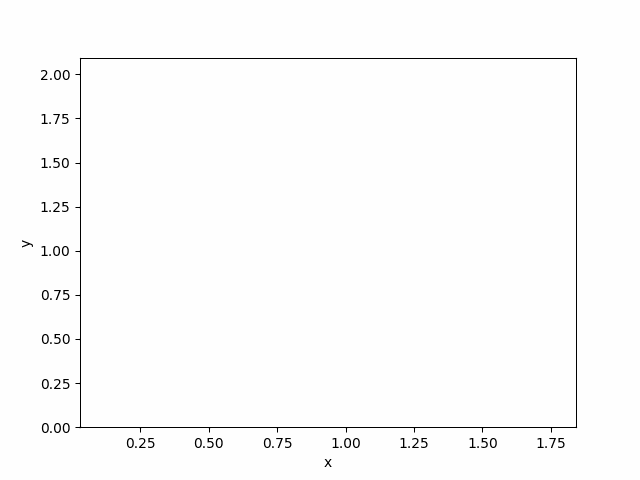

In [17]:
bool_value,vis=is_intersection_with_visualization(sections_one)
vis.show_gif(interval=300)

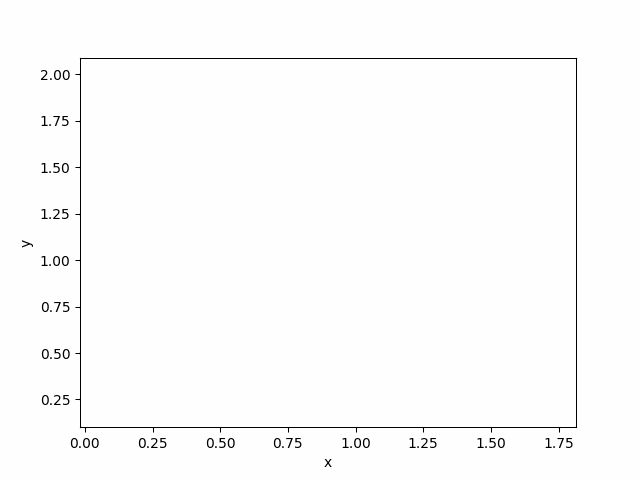

In [18]:
bool_value,vis=is_intersection_with_visualization(sections_two)
vis.show_gif(interval=200)

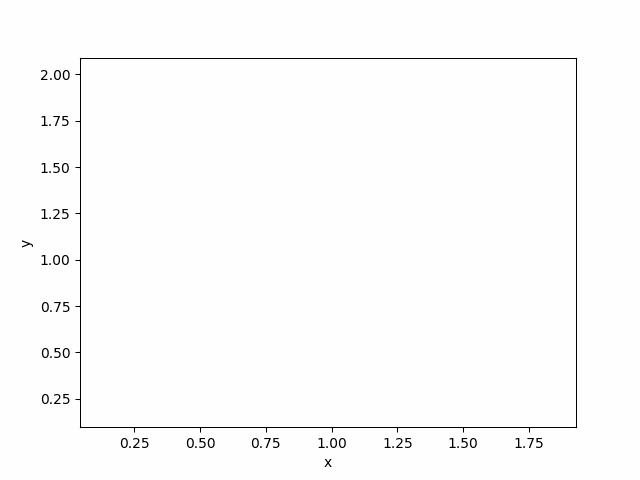

In [19]:
bool_value,vis=is_intersection_with_visualization(sections_three)
vis.show_gif(interval=200)

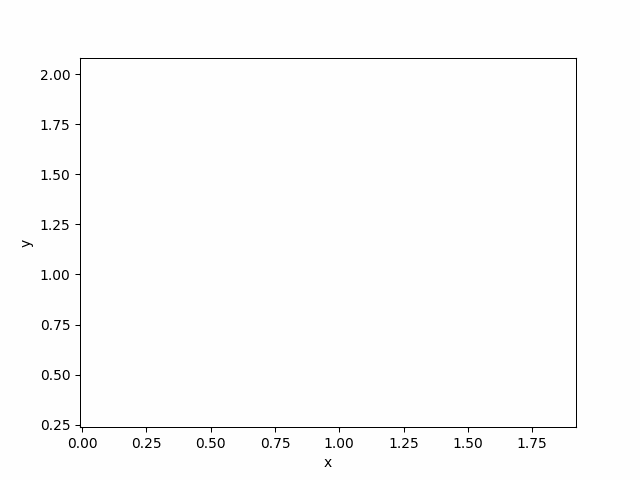

In [20]:
bool_value,vis=is_intersection_with_visualization(sections_four)
vis.show_gif(interval=200)

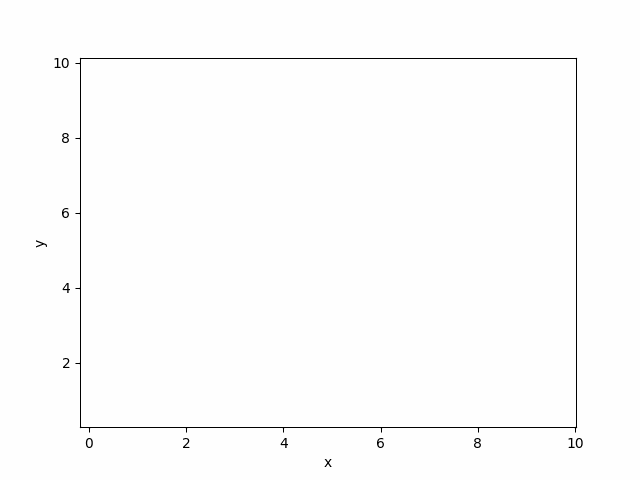

In [39]:
bool_value,vis=is_intersection_with_visualization(sections_five)
vis.show_gif(interval=200)

Uzupełnij funkcję ```find_intersections```

In [21]:
from sortedcontainers import SortedSet
eps = 10e-15
 
class Point:
    def __init__(self, x, y):
        self.x = x  # x-coordinate
        self.y = y  # y-coordinate
        
    def __eq__(self, other):  # Overloading == operator
        return self.x == other.x and self.y == other.y
    
    def __gt__(self, other):  # Overloading > operator
        return self.x > other.x
    
    def __hash__(self):  # Custom hash for using Point in sets/dicts
        return hash((self.x, self.y))
    
    def __getitem__(self, index):  # Access by index
        if index == 0:
            return self.x
        elif index == 1:
            return self.y
        else:
            raise IndexError("Index out of range. Use 0 for x and 1 for y.")
    
class Section:
    def __init__(self,L,R,Ind):
        self.Ind=Ind # ideks w ogrinalnej tablicy segments
        self.L=L #lewy koniec odcinka
        self.R=R #prawy koniec odcinka
        self.a=(self.L.y-self.R.y) / (self.L.x-self.R.x) #współczynnik nachylenia
        self.b=self.L.y - self.a * self.L.x #wyraz wolny
        self.x=L.x
        
    def update_x(x): #metoda statyczna (pole wspólne dla klasy)
        Section.x=x
        
    def __eq__(self,other):
        return (self.L==other.L and self.R==other.R and self.Ind == other.Ind)
    
    def __gt__(self,other):
        return self.a * Section.x + self.b > other.a * Section.x + other.b
    
    def __hash__(self):
        return hash((self.Ind,self.L,self.R))
    
    def list_of_tuples(self):
        return [(self.L[0], self.L[1]), (self.R[0], self.R[1]), self.Ind]

def intersects(section_one,section_two):
    """
    Funkcja sprawdza, czy podane odcinki się przecinają
    :param section_one: pierwszy sprawdzany odcinek
    :param section_two: drugi sprawdzany odcinek
    :return: współrzędne punktu przecięcia - jeżeli odcinki się przecinają, None w przeciwnym razie
    """
    (a_one,b_one)=section_one.a,section_one.b
    (a_two,b_two)=section_two.a,section_two.b
    (l_one,u_one)=section_one.L.x,section_one.R.x
    (l_two,u_two)=section_two.L.x,section_two.R.x
    
    if a_one==a_two:
        return None
    x=(b_two-b_one)/(a_one-a_two)
    if max(l_one,l_two)<x<min(u_one,u_two):
        y=a_two*x+b_two
        return (x, y)
    return None

def find_intersections(segements):
    events = SortedSet()
    states = SortedSet()
    ans_with_index = set()
    ans_with_segemnts = set()

    for i in range(len(segements)):
        events.add((Point(segements[i][0][0], segements[i][0][1]), 'l', i))
        events.add((Point(segements[i][1][0], segements[i][1][1]), 'r', i))

    while events:
        point, type, ind = events.pop(0)
        if type == 'l':
            Section.update_x(point[0])
            curr_sect = Section(Point(*segements[ind][0]), Point(*segements[ind][1]), ind)
            states.add(curr_sect)
            curr_ind = states.index(curr_sect)

            above = curr_ind + 1
            if above < len(states):
                inter_point = intersects(states[above], curr_sect)
                if inter_point and inter_point[0] > point[0]:
                    ans_with_index.add((inter_point, min(curr_sect.Ind+1, states[above].Ind+1), max(curr_sect.Ind+1, states[above].Ind+1)))
                    events.add((Point(inter_point[0], inter_point[1]), 'i', (curr_sect, states[above])))

            below = curr_ind - 1
            if below > -1:
                inter_point = intersects(states[below], curr_sect)
                if inter_point and inter_point[0] > point[0]:
                    ans_with_index.add((inter_point, min(curr_sect.Ind+1, states[below].Ind+1),  max(curr_sect.Ind+1, states[below].Ind+1)))
                    events.add((Point(inter_point[0], inter_point[1]), 'i', (states[below], curr_sect)))
        elif type == 'r':
            Section.update_x(point[0])
            curr_sect = Section(Point(*segements[ind][0]), Point(*segements[ind][1]), ind)
            curr_ind = states.index(curr_sect)
            above = curr_ind + 1
            below = curr_ind - 1

            if below > -1 and above < len(states):
                inter_point = intersects(states[below], states[above])
                if inter_point and inter_point[0] > point[0]:
                    ans_with_index.add((inter_point, min(states[below].Ind+1, states[above].Ind+1), max(states[below].Ind+1, states[above].Ind+1)))
                    events.add((Point(inter_point[0], inter_point[1]), 'i', (states[below], states[above])))
            states.discard(curr_sect)
        else:
            seg1 = ind[0]
            seg2 = ind[1]
            states.discard(seg1)
            states.discard(seg2)
            Section.update_x(point[0] + eps)
            states.add(seg1)
            states.add(seg2)

            seg1_ind = states.index(seg1)
            seg2_ind = states.index(seg2)

            curr_sect = seg1
            below = seg1_ind - 1
            above = seg1_ind + 1

            if above < len(states):
                inter_point = intersects(states[above], curr_sect)
                if inter_point and inter_point[0] > point[0]:
                    ans_with_index.add((inter_point, min(curr_sect.Ind+1, states[above].Ind+1), max(curr_sect.Ind+1, states[above].Ind+1)))
                    events.add((Point(inter_point[0], inter_point[1]), 'i', (curr_sect, states[above])))

            if below > -1:
                inter_point = intersects(states[below], curr_sect)
                if inter_point and inter_point[0] > point[0]:
                    ans_with_index.add((inter_point, min(curr_sect.Ind+1, states[below].Ind+1), max(curr_sect.Ind+1, states[below].Ind+1)))
                    events.add((Point(inter_point[0], inter_point[1]), 'i', (states[below], curr_sect)))
            
            curr_sect = seg2
            below = seg2_ind - 1
            above = seg2_ind + 1

            if above < len(states):
                inter_point = intersects(states[above], curr_sect)
                if inter_point and inter_point[0] > point[0]:
                    ans_with_index.add((inter_point, min(curr_sect.Ind+1, states[above].Ind+1), max(curr_sect.Ind+1, states[above].Ind+1)))
                    events.add((Point(inter_point[0], inter_point[1]), 'i', (curr_sect, states[above])))

            if below > -1:
                inter_point = intersects(states[below], curr_sect)
                if inter_point and inter_point[0] > point[0]:
                    ans_with_index.add((inter_point, min(curr_sect.Ind+1, states[below].Ind+1), max(curr_sect.Ind+1, states[below].Ind+1)))
                    events.add((Point(inter_point[0], inter_point[1]), 'i', (states[below], curr_sect)))

    return ans_with_index

ex = [[(-0.034729840063279685, 0.019299425704806472), (0.030693547033494514, -0.03327410370695825)],
[(-0.02962903361166678, -0.03563317233440923), (0.03379838574317193, 0.028735700214610402)],
[(0.01117741800123645, 0.031431778645982955), (0.012064514775429996, -0.032937093903036674)],
[(0.02226612767865581, 0.028061680606767267), (0.022709676065752582, -0.03394812331480138)],
[(-0.024306452966505486, -0.015412584099115098), (-0.017431452966505487, -0.007661358608919019)]]
find_intersections(ex)


{((-0.0016743790516658117, -0.007263586832941072), 1, 2),
 ((0.011526074740254208, 0.006132801296422352), 2, 3),
 ((0.011860591253227505, -0.01814014322949553), 1, 3),
 ((0.022344451130778698, 0.017111754849194583), 2, 4),
 ((0.022658670631229855, -0.026817363547212647), 1, 4)}

In [22]:
Test().runtest(3, find_intersections)

Lab 4, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.001s


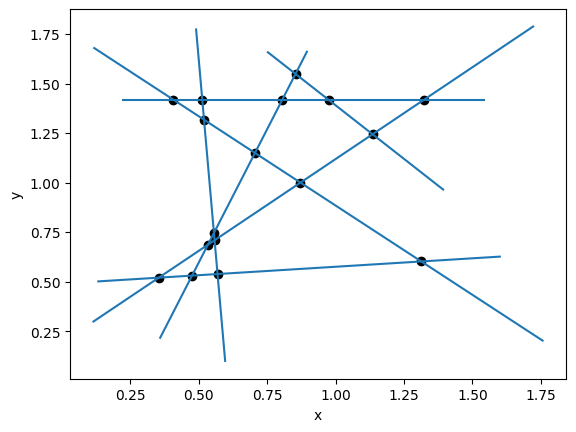

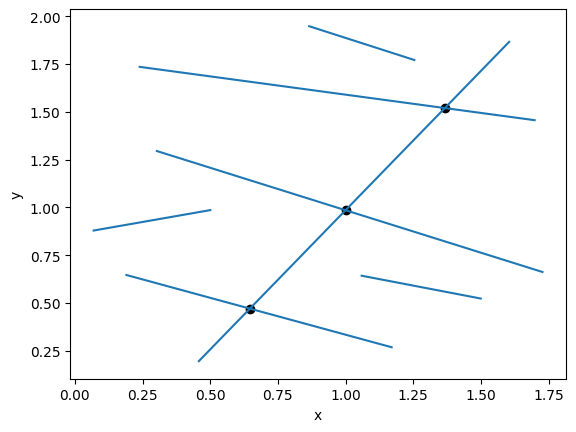

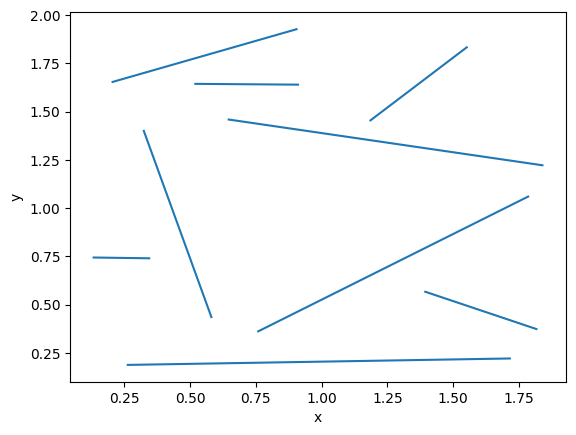

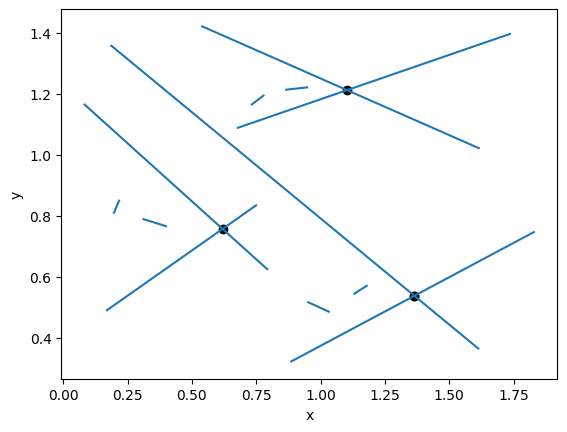

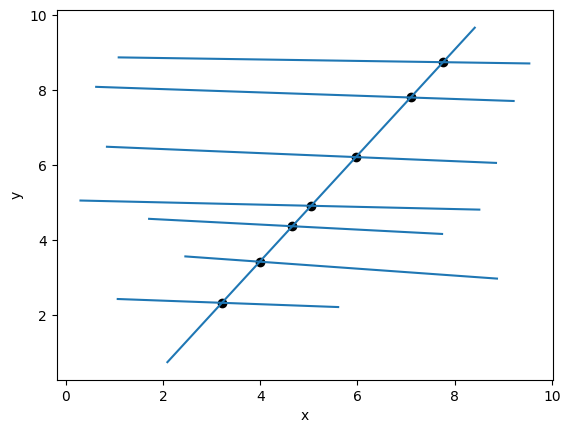

In [23]:
vis=Visualizer()
vis.add_line_segment(sections_one)
res = find_intersections(sections_one)
for elem in res:
    vis.add_point(elem[0], color='black')
vis.show()
vis.clear()

vis.add_line_segment(sections_two)
res = find_intersections(sections_two)
for elem in res:
    vis.add_point(elem[0], color='black')
vis.show()
vis.clear()

vis.add_line_segment(sections_three)
res = find_intersections(sections_three)
for elem in res:
    vis.add_point(elem[0], color='black')
vis.show()
vis.clear()

vis.add_line_segment(sections_four)
res = find_intersections(sections_four)
for elem in res:
    vis.add_point(elem[0], color='black')
vis.show()
vis.clear()

vis.add_line_segment(sections_five)
res = find_intersections(sections_five)
for elem in res:
    vis.add_point(elem[0], color='black')
vis.show()
vis.clear()

Uzupełnij funkcję ```find_intersections_with_visualization```

In [24]:
from sortedcontainers import SortedSet
eps = 10e-15
 
class Point:
    def __init__(self, x, y):
        self.x = x  # x-coordinate
        self.y = y  # y-coordinate
        
    def __eq__(self, other):  # Overloading == operator
        return self.x == other.x and self.y == other.y
    
    def __gt__(self, other):  # Overloading > operator
        return self.x > other.x
    
    def __hash__(self):  # Custom hash for using Point in sets/dicts
        return hash((self.x, self.y))
    
    def __getitem__(self, index):  # Access by index
        if index == 0:
            return self.x
        elif index == 1:
            return self.y
        else:
            raise IndexError("Index out of range. Use 0 for x and 1 for y.")
    
class Section:
    def __init__(self,L,R,Ind):
        self.Ind=Ind # ideks w ogrinalnej tablicy segments
        self.L=L #lewy koniec odcinka
        self.R=R #prawy koniec odcinka
        self.a=(self.L.y-self.R.y) / (self.L.x-self.R.x) #współczynnik nachylenia
        self.b=self.L.y - self.a * self.L.x #wyraz wolny
        self.x=L.x
        
    def update_x(x): #metoda statyczna (pole wspólne dla klasy)
        Section.x=x
        
    def __eq__(self,other):
        return (self.L==other.L and self.R==other.R and self.Ind == other.Ind)
    
    def __gt__(self,other):
        return self.a * Section.x + self.b > other.a * Section.x + other.b
    
    def __hash__(self):
        return hash((self.Ind,self.L,self.R))
    
    def list_of_tuples(self):
        return [(self.L[0], self.L[1]), (self.R[0], self.R[1])]

def intersects(section_one,section_two):
    """
    Funkcja sprawdza, czy podane odcinki się przecinają
    :param section_one: pierwszy sprawdzany odcinek
    :param section_two: drugi sprawdzany odcinek
    :return: współrzędne punktu przecięcia - jeżeli odcinki się przecinają, None w przeciwnym razie
    """
    (a_one,b_one)=section_one.a,section_one.b
    (a_two,b_two)=section_two.a,section_two.b
    (l_one,u_one)=section_one.L.x,section_one.R.x
    (l_two,u_two)=section_two.L.x,section_two.R.x
    
    if a_one==a_two:
        return None
    x=(b_two-b_one)/(a_one-a_two)
    if max(l_one,l_two)<x<min(u_one,u_two):
        y=a_two*x+b_two
        return (x, y)
    return None

def find_intersections_with_visualization(segements):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    points = set()
    events = SortedSet()
    states = SortedSet()
    vis = Visualizer()
    vis.add_line_segment(segements)

    for i in range(len(segements)):
        events.add((Point(segements[i][0][0], segements[i][0][1]), 'l', i))
        events.add((Point(segements[i][1][0], segements[i][1][1]), 'r', i))

    while events:
        point, type, ind = events.pop(0)
        pom = vis.add_point((point[0], point[1]), color = 'red')
        pom2 = vis.add_line([(point[0], 1), (point[0], 0)], color = 'green')
        if type == 'l':
            Section.update_x(point[0])
            curr_sect = Section(Point(*segements[ind][0]), Point(*segements[ind][1]), ind)
            states.add(curr_sect)
            curr_ind = states.index(curr_sect)

            above = curr_ind + 1
            if above < len(states):
                pom3 = vis.add_line_segment([states[above].list_of_tuples(), curr_sect.list_of_tuples()], color='orange')
                inter_point = intersects(states[above], curr_sect)
                if inter_point and inter_point[0] > point[0]:
                    events.add((Point(inter_point[0], inter_point[1]), 'i', (curr_sect, states[above])))
                vis.remove_figure(pom3)
                if inter_point and inter_point not in points:
                    points.add(inter_point)
                    vis.add_point(inter_point, color='black')

            below = curr_ind - 1
            if below > -1:
                pom3 = vis.add_line_segment([states[below].list_of_tuples(), curr_sect.list_of_tuples()], color='orange')
                inter_point = intersects(states[below], curr_sect)
                if inter_point and inter_point[0] > point[0]:
                    events.add((Point(inter_point[0], inter_point[1]), 'i', (states[below], curr_sect)))
                vis.remove_figure(pom3)
                if inter_point and inter_point not in points:
                    points.add(inter_point)
                    vis.add_point(inter_point, color='black')
        elif type == 'r':
            Section.update_x(point[0])
            curr_sect = Section(Point(*segements[ind][0]), Point(*segements[ind][1]), ind)
            curr_ind = states.index(curr_sect)
            above = curr_ind + 1
            below = curr_ind - 1

            if below > -1 and above < len(states):
                pom3 = vis.add_line_segment([states[above].list_of_tuples(), states[below].list_of_tuples()], color='orange')
                inter_point = intersects(states[below], states[above])
                if inter_point and inter_point[0] > point[0]:
                    events.add((Point(inter_point[0], inter_point[1]), 'i', (states[below], states[above])))
                vis.remove_figure(pom3)
                if inter_point and inter_point not in points:
                    points.add(inter_point)
                    vis.add_point(inter_point, color='black')
            states.discard(curr_sect)
        else:
            seg1 = ind[0]
            seg2 = ind[1]
            states.discard(seg1)
            states.discard(seg2)
            Section.update_x(point[0] + eps)
            states.add(seg1)
            states.add(seg2)

            seg1_ind = states.index(seg1)
            seg2_ind = states.index(seg2)

            curr_sect = seg1
            below = seg1_ind - 1
            above = seg1_ind + 1

            if above < len(states):
                pom3 = vis.add_line_segment([states[above].list_of_tuples(), curr_sect.list_of_tuples()], color='orange')
                inter_point = intersects(states[above], curr_sect)
                if inter_point and inter_point[0] > point[0]:
                    events.add((Point(inter_point[0], inter_point[1]), 'i', (curr_sect, states[above])))
                vis.remove_figure(pom3)
                if inter_point and inter_point not in points:
                    points.add(inter_point)
                    vis.add_point(inter_point, color='black')

            if below > -1:
                pom3 = vis.add_line_segment([states[below].list_of_tuples(), curr_sect.list_of_tuples()], color='orange')
                inter_point = intersects(states[below], curr_sect)
                if inter_point and inter_point[0] > point[0]:
                    events.add((Point(inter_point[0], inter_point[1]), 'i', (states[below], curr_sect)))
                vis.remove_figure(pom3)
                if inter_point and inter_point not in points:
                    points.add(inter_point)
                    vis.add_point(inter_point, color='black')

            
            curr_sect = seg2
            below = seg2_ind - 1
            above = seg2_ind + 1

            if above < len(states):
                pom3 = vis.add_line_segment([states[above].list_of_tuples(), curr_sect.list_of_tuples()], color='orange')
                inter_point = intersects(states[above], curr_sect)
                if inter_point and inter_point[0] > point[0]:
                    events.add((Point(inter_point[0], inter_point[1]), 'i', (curr_sect, states[above])))
                vis.remove_figure(pom3)
                if inter_point and inter_point not in points:
                    points.add(inter_point)
                    vis.add_point(inter_point, color='black')

            if below > -1:
                pom3 = vis.add_line_segment([states[below].list_of_tuples(), curr_sect.list_of_tuples()], color='orange')
                inter_point = intersects(states[below], curr_sect)
                if inter_point and inter_point[0] > point[0]:
                    events.add((Point(inter_point[0], inter_point[1]), 'i', (states[below], curr_sect)))
                vis.remove_figure(pom3)
                if inter_point and inter_point not in points:
                    points.add(inter_point)
                    vis.add_point(inter_point, color='black')

        vis.remove_figure(pom)
        vis.remove_figure(pom2)
    return vis
    

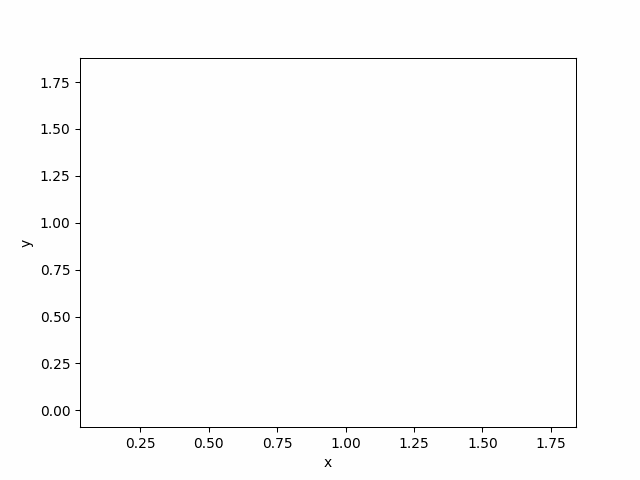

In [25]:
vis=find_intersections_with_visualization(sections_one)
vis.show_gif(interval=300)

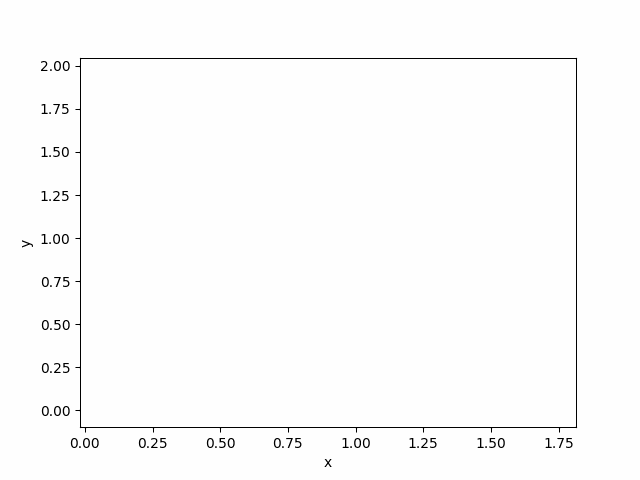

In [26]:
vis=find_intersections_with_visualization(sections_two)
vis.show_gif(interval=300)

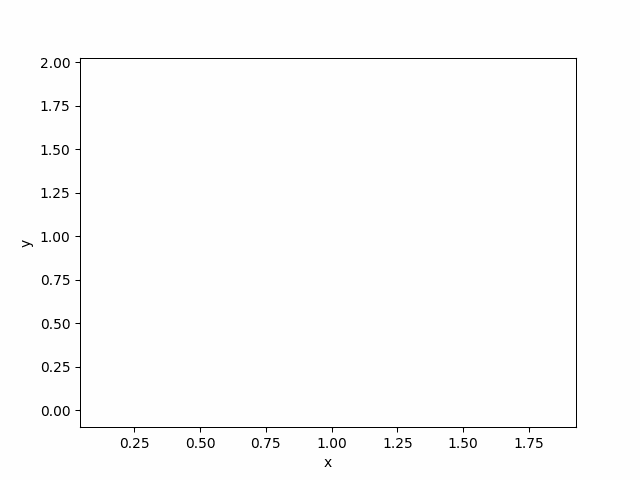

In [27]:
vis=find_intersections_with_visualization(sections_three)
vis.show_gif(interval=300)

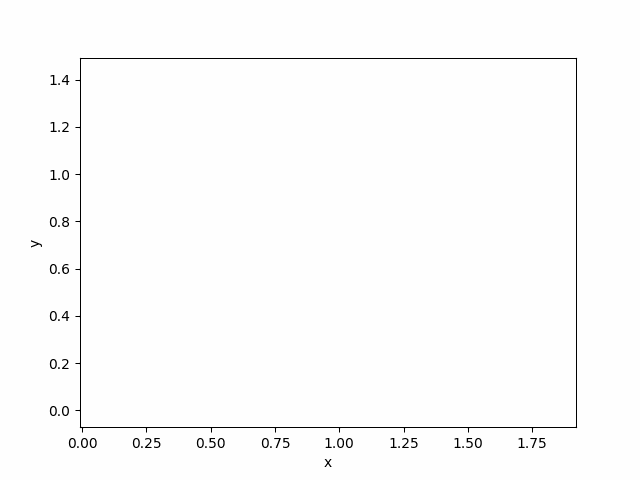

In [28]:
vis=find_intersections_with_visualization(sections_four)
vis.show_gif(interval=300)

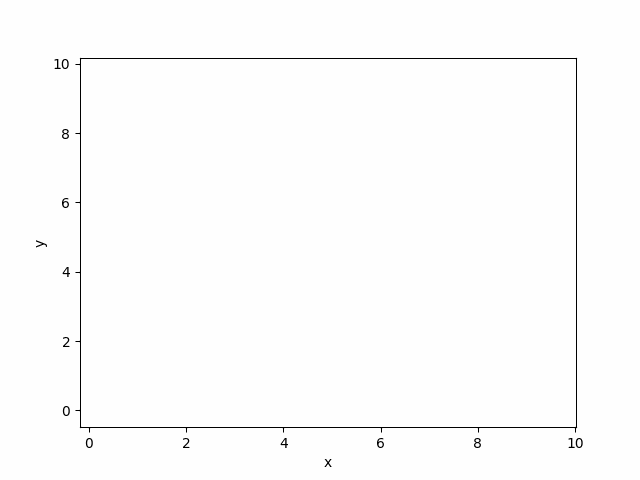

In [29]:
vis=find_intersections_with_visualization(sections_five)
vis.show_gif(interval=200)

### Czy konieczne były zmiany w strukturze zdarzeń. Jeśli tak, to jakie? Czy w przypadku obu algorytmów konieczne są takie same struktury zdarzeń?
### Odpowiedź uzasadnij. 

In [30]:
# Odpowiedź here

### Jak obsługiwane są zdarzenia początku odcinka, końca odcinka i przecięcia odcinków z uwzględnianiem wybranych struktur danych?

In [31]:
# Odpowiedź here

### Samemu zaprojektuj test, który uwzględnia taki układ odcinków, przy którym pewne przecięcia będą wykrywane więcej niż jeden raz

In [32]:
# testing_sections = ???

In [33]:
### Czy Twój program uwzględnia powyższy przypadek? Jeśli tak, to jak? 

In [34]:
# Odpowiedź here

### Zadanie dodatkowe
Zaimplementuj inną strukturę stanu. Opisz ją w sprawozdaniu. Porównaj efektywność algorytmu dla obu struktur robiąc testy na odpowiednio dużych zestawach odcinków.